## Perceptron Learning Algorithm

The perceptron is a simple supervised machine learning algorithm and one of the earliest neural network architectures. It was introduced by Rosenblatt in the late 1950s. A perceptron represents a binary linear classifier that maps a set of training examples (of $d$ dimensional input vectors) onto binary output values using a $d-1$ dimensional hyperplane. But Today, we will implement **Multi-Classes Perceptron Learning Algorithm** 
**Given:**
* dataset $\{(x^i, y^i)\}$, $i \in (1, M)$
* $x^i$ is $d$ dimension vector, $x^i = (x^i_1, \dots x^i_d)$
* $y^i$ is multi-class target varible $y^i \in \{0,1,2\}$

A perceptron is trained using gradient descent. The training algorithm has different steps. In the beginning (step 0) the model parameters are initialized. The other steps (see below) are repeated for a specified number of training iterations or until the parameters have converged.

**Step0:** Initial the weight vector and bias with zeros     
**Step1:** Compute the linear combination of the input features and weight. $y^i_{pred} = argmax_k W_k*x^i + b$    
**Step2:** Compute the gradients for parameters $W_k$, $b$. **Derive the parameter update equation Here(5 points)**   

##################################     
TODO: Derive you answer hear
#################################

Rewrite $W=[W^T, b]^T$, and add an element 1 in the last dimension of sample $x$, i.e. $x=[x,1]$. Then assume that  $s_j(x) = W_j*x, j\in\{0,1,2\}$. Define the loss function as
                  $$ J = \max(0, max_j s_j(x)-s_{y_i}(x)), where j \neq y_i$$  
where $y_i$ is the label of x.  
Suppose $k = \arg max_j s_j(x)$, then we have
$$
\frac{\partial J}{\partial w_j} = \left\{\begin{aligned}
-x, j=y\neq s\\
x, j=s\neq y \\
0, otherwise
\end{aligned}
\right.
$$
The update rule is for $\max W_j*x > W_{y_i}x, s=\arg min_j W_i*x $, then
\begin{align*}
W_{y'} = W_y + \eta*x \\
W_{s'} = W_s - \eta*x
\end{align*}

In [2]:
from sklearn import datasets
import numpy as np
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
import random

np.random.seed(0)
random.seed(0)

In [3]:
iris = datasets.load_iris()
X = iris.data
print(type(X))
y = iris.target
y = np.array(y)
print('X_Shape:', X.shape)
print('y_Shape:', y.shape)
print('Label Space:', np.unique(y))

<class 'numpy.ndarray'>
X_Shape: (150, 4)
y_Shape: (150,)
Label Space: [0 1 2]


In [4]:
## split the training set and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=0)
print('X_train_Shape:', X_train.shape)
print('X_test_Shape:',  X_test.shape)
print('y_train_Shape:', y_train.shape)
print('y_test_Shape:',  y_train.shape)

print(type(y_train))



X_train_Shape: (105, 4)
X_test_Shape: (45, 4)
y_train_Shape: (105,)
y_test_Shape: (105,)
<class 'numpy.ndarray'>


In [5]:
class MultiClsPLA(object):
    
    ## We recommend to absorb the bias into weight.  W = [w, b]
    
    def __init__(self, X_train=None, y_train=None, X_test=None, y_test=None, lr=None, num_epoch=None, weight_dimension=None, num_cls=None):
        super(MultiClsPLA, self).__init__()
        self.y_train = None
        self.y_test = None
        self.X_train = X_train
        self.y_train = y_train,     
        self.X_test = X_test,
        self.y_test = y_test,
        self.y_train = self.y_train[0]
        self.y_test = self.y_test[0]
        self.weight = self.initial_weight(weight_dimension, num_cls)
        self.sample_mean = np.mean(self.X_train)
        self.sample_std = np.std(self.X_train)
        self.num_epoch = num_epoch
        self.lr = lr
          
    def initial_weight(self, weight_dimension=None, num_cls=None):
        weight = None
        #########################################
        ##  ToDo: Initialize the weight with   ##
        ##  samll std and zero mean gaussian   ##
        #########################################
        weight = 0.01*np.random.randn(weight_dimension+1, num_cls)
        return weight
        
    def data_preprocessing(self, data=None):
        #####################################
        ##  ToDo: Normlize the data        ##
        #####################################
        normlize_data = (data-self.sample_mean)/self.sample_std
        return normlize_data
    
    def train_step(self, X_train=None, y_train=None, shuffle_idx=None):
        np.random.shuffle(shuffle_idx)
        X_train = X_train[shuffle_idx]
        y_train = y_train[shuffle_idx]
        train_acc = None
        ##############################################
        ## TODO: to implement the training process  ##
        ## and update the weights                   ##
        ##############################################
        #weights = self.initial_weight(weight_dimension=X_train.shape[1], y_train.shape[1])
        
        #scores = X_train@self.weight
        #y_pred = np.argmax(scores, axis=1)
        #dW = np.zero
        #dW[y_pred*y_train<=0] = self.weight@y_train
        
        #self.weight = dW
        
         
        for i in range(X_train.shape[0]):
            score = X_train[i] @ self.weight
            y_i = y_train[i]
            k = np.argmax(score)
            if k==y_i:
                pass
            else:
                #self.weight[:, y_i] += self.lr*X_train[i]
                #self.weight[:, k] -= self.lr*X_train[i]
                self.weight[:, y_i] += self.lr*y_train[i]*X_train[i]
                self.weight[:, k] -= self.lr*y_train[i]*X_train[i]
        
        self.weight /= X_train.shape[0]
        
        scores = X_train@self.weight
        train_pred = np.argmax(scores, axis=1)
        train_acc = (train_pred==y_train).mean()      
        return train_acc
        
    def test_step(self, X_test=None, y_test=None):
        
        
        X_test = self.data_preprocessing(data=X_test[0])
        num_sample = X_test.shape[0]
        test_acc = None
        
        #########################################
        ##  ToDO: Evaluate the test set and    ##
        ##  return the test acc                ##
        #########################################
        X_test = np.concatenate((X_test,np.ones((X_test.shape[0], 1))), axis = 1)
        scores = X_test@self.weight
        y_test_pred = np.argmax(scores, axis=1)
        test_acc = (y_test_pred==y_test).mean()
        return test_acc
        
    def train(self):
        
        self.total_acc_train = []
        self.total_acc_tst = []
        
        self.X_train = self.data_preprocessing(data=self.X_train)
        num_sample = self.X_train.shape[0]
        
        ######################################################
        ### TODO: In order to absorb the bias into weights ###
        ###  we need to modify the input data.             ###
        ###  So You need to transform the input data       ###
        ######################################################
        self.X_train = np.concatenate((self.X_train, np.ones((self.X_train.shape[0],1)) ), axis=1)
        self.X_test = self.data_preprocessing(data=self.X_test)
       
         
        
        shuffle_index = np.array(range(0, num_sample))
        for epoch in range(self.num_epoch):
            training_acc = self.train_step(X_train=self.X_train, y_train=self.y_train, shuffle_idx=shuffle_index)
            tst_acc = self.test_step(X_test=self.X_test,  y_test=self.y_test)
            self.total_acc_train.append(training_acc)
            self.total_acc_tst.append(tst_acc)
            print('epoch:', epoch, 'traing_acc:%.3f'%training_acc, 'tst_acc:%.3f'%tst_acc)
    
    def vis_acc_curve(self):
        train_acc = np.array(self.total_acc_train)
        tst_acc = np.array(self.total_acc_tst)
        plt.plot(train_acc)
        plt.plot(tst_acc)
        plt.legend(['train_acc', 'tst_acc'])
        plt.show()

epoch: 0 traing_acc:0.171 tst_acc:0.244
epoch: 1 traing_acc:0.581 tst_acc:0.244
epoch: 2 traing_acc:0.600 tst_acc:0.400
epoch: 3 traing_acc:0.410 tst_acc:0.400
epoch: 4 traing_acc:0.533 tst_acc:0.400
epoch: 5 traing_acc:0.629 tst_acc:0.400
epoch: 6 traing_acc:0.543 tst_acc:0.400
epoch: 7 traing_acc:0.629 tst_acc:0.400
epoch: 8 traing_acc:0.429 tst_acc:0.400
epoch: 9 traing_acc:0.629 tst_acc:0.400
epoch: 10 traing_acc:0.657 tst_acc:0.400
epoch: 11 traing_acc:0.390 tst_acc:0.400
epoch: 12 traing_acc:0.533 tst_acc:0.400
epoch: 13 traing_acc:0.390 tst_acc:0.400
epoch: 14 traing_acc:0.543 tst_acc:0.400


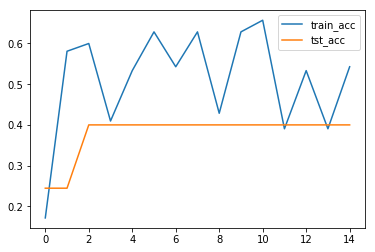

In [6]:
#######################################################
### TODO: 
### 1. You need to import the model and pass some parameters. 
### 2. Then training the model with some epoches.
### 3. Visualize the training acc and test acc verus epoches
lr = 1.5e-6; num_epoch = 15; weight_dimension = X_train.shape[1]; num_cls=np.unique(y_train).size
multiPLA = MultiClsPLA(X_train, y_train, X_test, y_test, lr, num_epoch, weight_dimension, num_cls)

multiPLA.train()
multiPLA.vis_acc_curve()
